In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [4]:
BOP = pd.read_csv(r"C:\Users\pc\Desktop\KAIM10X\Week-10-KAIM-10X\Data\BrentOilPrices.csv")
BOP.head()

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


# Check the data types and missing values

In [5]:

print("\nData types and missing values:")
print(BOP.info())


Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9011 non-null   object 
 1   Price   9011 non-null   float64
dtypes: float64(1), object(1)
memory usage: 140.9+ KB
None


# Summary statistics

In [6]:

print("\nSummary statistics:")
print(BOP.describe())


Summary statistics:
             Price
count  9011.000000
mean     48.420782
std      32.860110
min       9.100000
25%      19.050000
50%      38.570000
75%      70.090000
max     143.950000


# Plotting the price over time

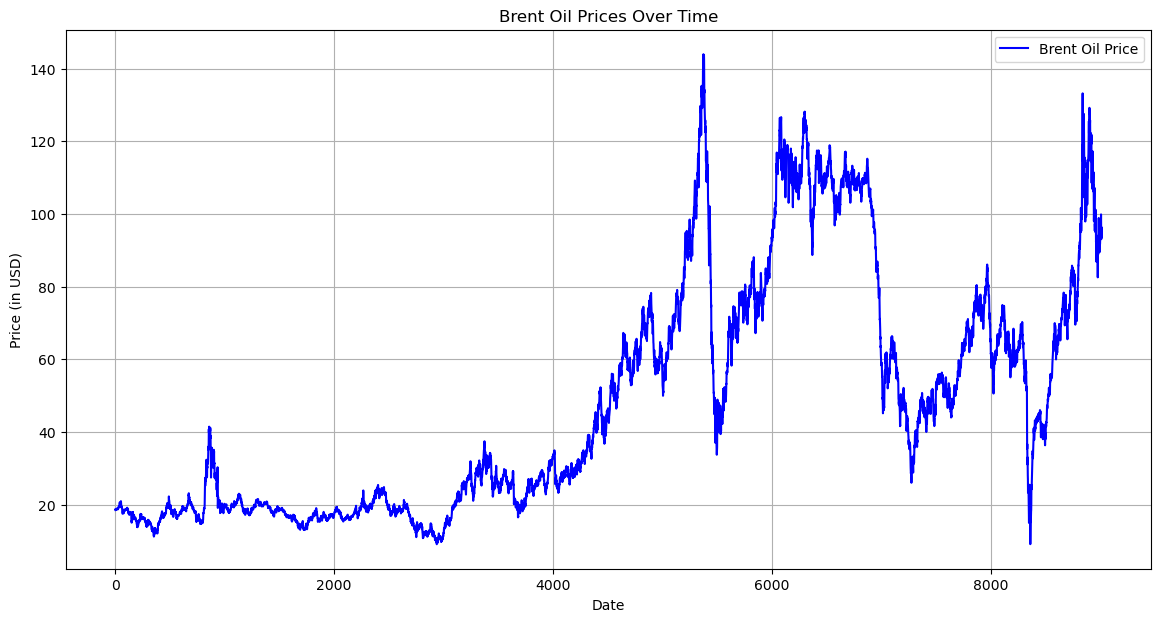

In [7]:

plt.figure(figsize=(14, 7))
plt.plot(BOP['Price'], label='Brent Oil Price', color='b')
plt.title('Brent Oil Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (in USD)')
plt.legend()
plt.grid()
plt.show()

# Date' to datetime

In [11]:
BOP['Date'] = pd.to_datetime(BOP['Date'])

# Set the date as the index

In [13]:

BOP.set_index('Date', inplace=True)

# Resampling to monthly average

In [16]:

monthly_avg = BOP['Price'].resample('M').mean()
print(monthly_avg )

Date
1987-05-31     18.580000
1987-06-30     18.860476
1987-07-31     19.856522
1987-08-31     18.979524
1987-09-30     18.313182
                 ...    
2022-07-31    111.925714
2022-08-31    100.446364
2022-09-30     89.764762
2022-10-31     93.331905
2022-11-30     95.999000
Freq: ME, Name: Price, Length: 427, dtype: float64


C:\Users\pc\AppData\Local\Temp\ipykernel_24180\872309792.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = BOP['Price'].resample('M').mean()


In [18]:
Yearly = BOP['Price'].resample('Y').mean()
print(Yearly )

Date
1987-12-31     18.525813
1988-12-31     14.905412
1989-12-31     18.228228
1990-12-31     23.761445
1991-12-31     20.041128
1992-12-31     19.319728
1993-12-31     17.013413
1994-12-31     15.856389
1995-12-31     17.015850
1996-12-31     20.639803
1997-12-31     19.108508
1998-12-31     12.758103
1999-12-31     17.901566
2000-12-31     28.660672
2001-12-31     24.455720
2002-12-31     24.993255
2003-12-31     28.850814
2004-12-31     38.259693
2005-12-31     54.574553
2006-12-31     65.161765
2007-12-31     72.441160
2008-12-31     96.944348
2009-12-31     61.738770
2010-12-31     79.609444
2011-12-31    111.264274
2012-12-31    111.570683
2013-12-31    108.555000
2014-12-31     98.969606
2015-12-31     52.316549
2016-12-31     43.638000
2017-12-31     54.124805
2018-12-31     71.335000
2019-12-31     64.319845
2020-12-31     42.101016
2021-12-31     70.855336
2022-12-31    103.477545
Freq: YE-DEC, Name: Price, dtype: float64


C:\Users\pc\AppData\Local\Temp\ipykernel_24180\748778182.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  Yearly = BOP['Price'].resample('Y').mean()


# Plotting Monthly Average Price

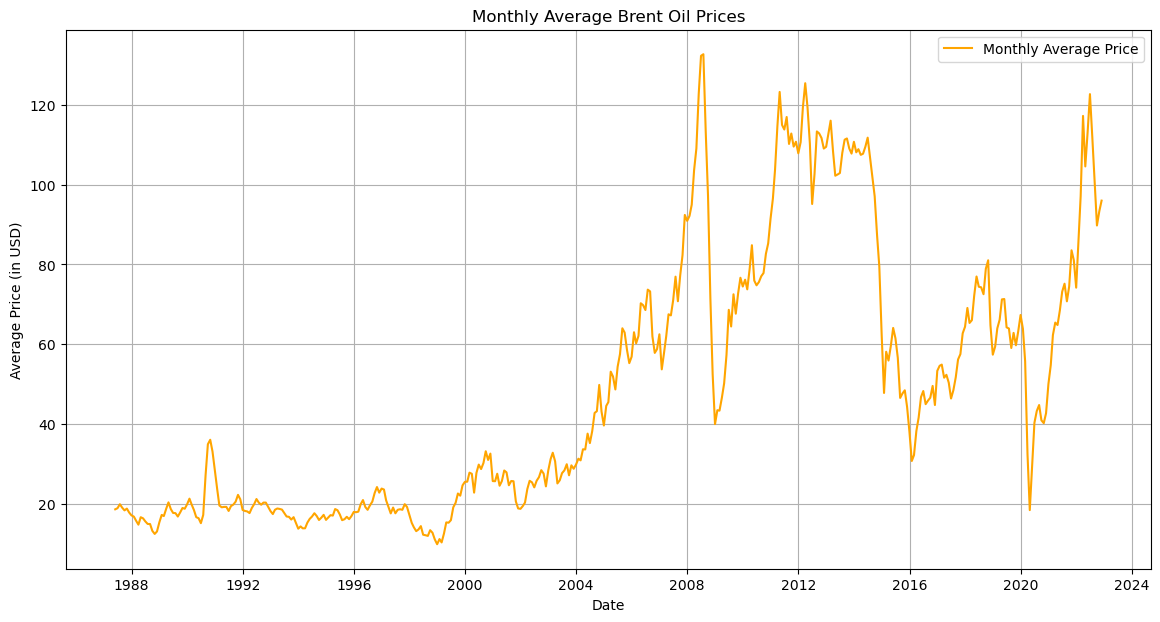

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(monthly_avg, label='Monthly Average Price', color='orange')
plt.title('Monthly Average Brent Oil Prices')
plt.xlabel('Date')
plt.ylabel('Average Price (in USD)')
plt.legend()
plt.grid()
plt.show()

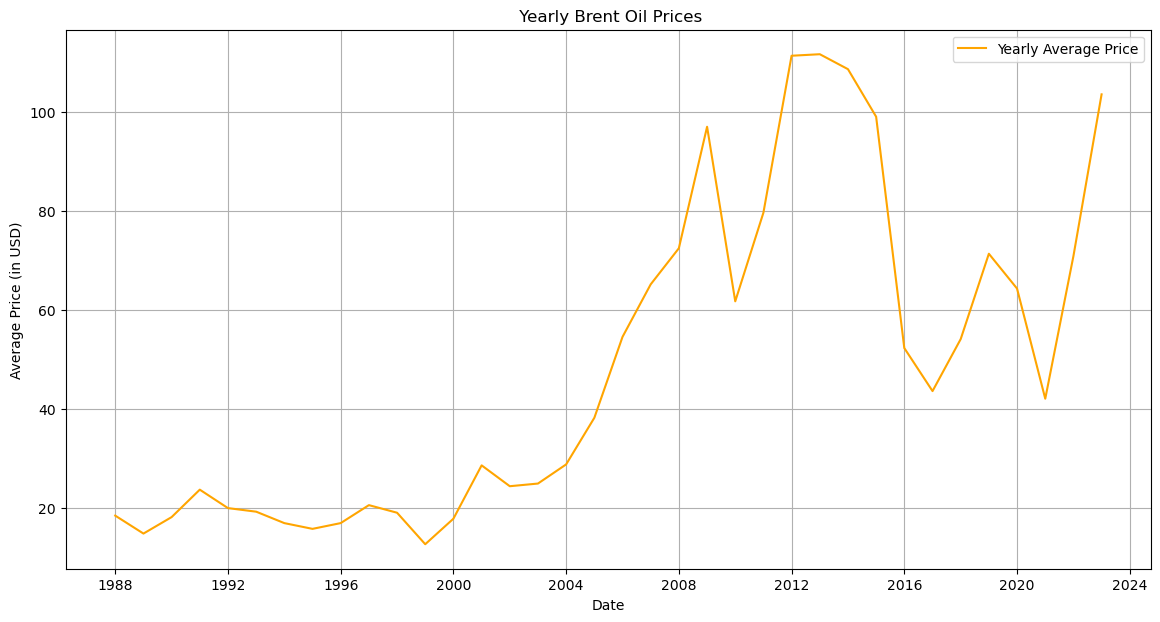

In [20]:
plt.figure(figsize=(14, 7))
plt.plot(Yearly, label='Yearly Average Price', color='orange')
plt.title(' Yearly Brent Oil Prices')
plt.xlabel('Date')
plt.ylabel('Average Price (in USD)')
plt.legend()
plt.grid()
plt.show()

# Seasonal Decomposition

<Figure size 1400x1000 with 0 Axes>

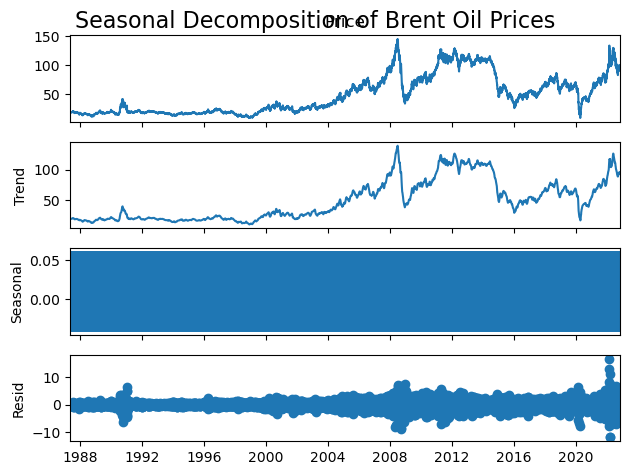

In [21]:

from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(BOP['Price'], model='additive', period=12)
plt.figure(figsize=(14, 10))
decomposition.plot()
plt.suptitle('Seasonal Decomposition of Brent Oil Prices', fontsize=16)
plt.show()

# Distribution of prices

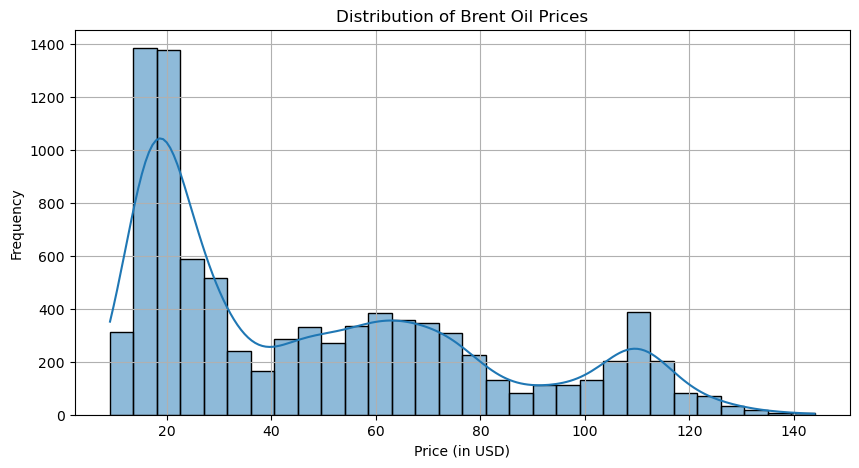

In [22]:

plt.figure(figsize=(10, 5))
sns.histplot(BOP['Price'], bins=30, kde=True)
plt.title('Distribution of Brent Oil Prices')
plt.xlabel('Price (in USD)')
plt.ylabel('Frequency')
plt.grid()
plt.show()

# Calculate quarterly average prices

In [24]:

quarterly_avg = BOP['Price'].resample('Q').mean()
print(quarterly_avg)

Date
1987-06-30     18.783103
1987-09-30     19.063030
1987-12-31     17.865538
1988-03-31     15.655323
1988-06-30     16.129841
                 ...    
2021-12-31     79.609062
2022-03-31    100.872344
2022-06-30    113.835246
2022-09-30    100.708125
2022-12-31     94.192258
Freq: QE-DEC, Name: Price, Length: 143, dtype: float64


C:\Users\pc\AppData\Local\Temp\ipykernel_24180\846826057.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_avg = BOP['Price'].resample('Q').mean()
